In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

## Vermont city:

In [2]:
df = pd.read_csv('VT_cleaned.csv', header = 0)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(3)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,VT-2010-00001,VT,2010-07-01,00:10,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,VT-2010-00002,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
2,VT-2010-00003,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09


In [4]:
np.shape(df)

(283285, 23)

This dataset contains 283285 records respresents states in Vermont .. each of which has 23 attributes .. 

In [5]:
df.isnull().any()

id                       False
state                    False
stop_date                False
stop_time                False
location_raw              True
county_name               True
county_fips               True
fine_grained_location     True
police_department        False
driver_gender             True
driver_age_raw            True
driver_age                True
driver_race_raw           True
driver_race               True
violation_raw             True
violation                 True
search_conducted         False
search_type_raw           True
search_type               True
contraband_found          True
stop_outcome              True
is_arrested              False
officer_id                True
dtype: bool

In [6]:
df.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                694
county_name                 705
county_fips                 705
fine_grained_location       347
police_department             0
driver_gender              1712
driver_age_raw             1171
driver_age                 1286
driver_race_raw            3984
driver_race                4817
violation_raw              2178
violation                  2178
search_conducted              0
search_type_raw            2240
search_type              279866
contraband_found             34
stop_outcome               2325
is_arrested                   0
officer_id                   12
dtype: int64

In [7]:
df.isnull().sum()/len(df)

id                       0.000000
state                    0.000000
stop_date                0.000000
stop_time                0.000000
location_raw             0.002450
county_name              0.002489
county_fips              0.002489
fine_grained_location    0.001225
police_department        0.000000
driver_gender            0.006043
driver_age_raw           0.004134
driver_age               0.004540
driver_race_raw          0.014064
driver_race              0.017004
violation_raw            0.007688
violation                0.007688
search_conducted         0.000000
search_type_raw          0.007907
search_type              0.987931
contraband_found         0.000120
stop_outcome             0.008207
is_arrested              0.000000
officer_id               0.000042
dtype: float64

mmm some of the attributes contain null values .. however, 98% of search_type variable records are nulls .. 

hence, let's remove this variable from the datatframe ! 

In [8]:
del df['search_type']

In [9]:
np.shape(df)

(283285, 22)

column is deleted succesfully .. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283285 entries, 0 to 283284
Data columns (total 22 columns):
id                       283285 non-null object
state                    283285 non-null object
stop_date                283285 non-null object
stop_time                283285 non-null object
location_raw             282591 non-null object
county_name              282580 non-null object
county_fips              282580 non-null float64
fine_grained_location    282938 non-null object
police_department        283285 non-null object
driver_gender            281573 non-null object
driver_age_raw           282114 non-null float64
driver_age               281999 non-null float64
driver_race_raw          279301 non-null object
driver_race              278468 non-null object
violation_raw            281107 non-null object
violation                281107 non-null object
search_conducted         283285 non-null bool
search_type_raw          281045 non-null object
contraband_found        

## Filling NAs:

In [11]:
## bool
int_var = df.select_dtypes(include=['bool'])
int_var.head()

,search_conducted,is_arrested
0,False,False
1,False,True
2,False,True
3,False,True
4,False,False


In [12]:
int_var.search_conducted.fillna(int_var.search_conducted.mode()[0], inplace=True)
int_var.is_arrested.fillna(int_var.is_arrested.mode()[0], inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
## float ..

float_var = df.select_dtypes(include=['float'])
float_var.head()

,county_fips,driver_age_raw,driver_age,officer_id
0,50023.0,22.0,22.0,-1.562157e+09
1,NaN,21.0,21.0,-1.562157e+09
2,NaN,21.0,21.0,-1.562157e+09
3,50001.0,18.0,18.0,-3.126844e+08
4,50005.0,18.0,18.0,9.225661e+08


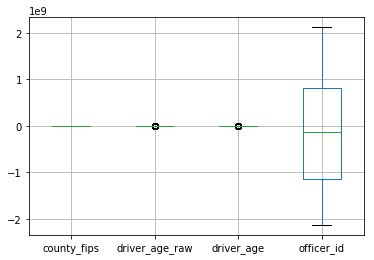

In [14]:
float_var.boxplot()

In [15]:
float_var.describe()

,county_fips,driver_age_raw,driver_age,officer_id
count,282580.000000,282114.000000,281999.000000,2.832730e+05
mean,50015.682561,38.776920,38.788162,-1.465118e+08
std,9.125609,15.574529,15.566545,1.180737e+09
min,50001.000000,0.000000,15.000000,-2.133012e+09
25%,50007.000000,25.000000,25.000000,-1.137408e+09
50%,50017.000000,36.000000,36.000000,-1.342127e+08
75%,50025.000000,50.000000,50.000000,8.198861e+08
max,50027.000000,101.000000,99.000000,2.118737e+09


The distribution of all float variables are almost normal .. 

hence, let's fill their empty cells with the mean values 

In [16]:
float_var.county_fips.fillna(float_var.county_fips.mean(), inplace=True)
float_var.driver_age_raw.fillna(float_var.driver_age_raw.mean(), inplace=True)
float_var.driver_age.fillna(float_var.driver_age.mean(), inplace=True)
float_var.officer_id.fillna(float_var.officer_id.mean(), inplace=True)

In [17]:
float_var.isnull().any()

county_fips       False
driver_age_raw    False
driver_age        False
officer_id        False
dtype: bool

In [18]:
cat_var = df.select_dtypes(include=['object'])
cat_var.head()

,id,state,stop_date,stop_time,location_raw,county_name,fine_grained_location,police_department,driver_gender,driver_race_raw,driver_race,violation_raw,violation,search_type_raw,contraband_found,stop_outcome
0,VT-2010-00001,VT,2010-07-01,00:10,East Montpelier,Washington County,COUNTY RD,MIDDLESEX VSP,M,White,White,Moving Violation,Moving violation,No Search Conducted,False,Citation
1,VT-2010-00002,VT,2010-07-01,00:10,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,White,White,Externally Generated Stop,Other,No Search Conducted,False,Arrest for Violation
2,VT-2010-00003,VT,2010-07-01,00:10,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,White,White,Externally Generated Stop,Other,No Search Conducted,False,Arrest for Violation
3,VT-2010-00004,VT,2010-07-01,00:11,Whiting,Addison County,N MAIN ST,NEW HAVEN VSP,F,White,White,Moving Violation,Moving violation,No Search Conducted,False,Arrest for Violation
4,VT-2010-00005,VT,2010-07-01,00:35,Hardwick,Caledonia County,i91 nb mm 62,ROYALTON VSP,M,White,White,Moving Violation,Moving violation,No Search Conducted,False,Written Warning


In [19]:
for i in cat_var:
    cat_var[i].fillna(cat_var[i].mode()[0], inplace=True)

In [20]:
cat_var.isnull().any()

id                       False
state                    False
stop_date                False
stop_time                False
location_raw             False
county_name              False
fine_grained_location    False
police_department        False
driver_gender            False
driver_race_raw          False
driver_race              False
violation_raw            False
violation                False
search_type_raw          False
contraband_found         False
stop_outcome             False
dtype: bool

## Montana city: 

In [21]:
df2 = pd.read_csv('MT_cleaned.csv', header = 0)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df2.head(3)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,lon,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,search_reason,stop_outcome_raw
0,MT-2009-00001,MT,2009-01-01,02:10,CASCADE,Cascade County,30013.0,US 89 N MM10 (SB),NaN,F,...,-111.802932,N,NaN,False,1994,FORD,EXPLORER,SPORT UTILITY,NaN,"TRAFFIC CITATION,WARNING"
1,MT-2009-00002,MT,2009-01-02,11:34,MISSOULA,Missoula County,30063.0,HWY 93 SO AND ANNS LANE S/B,NaN,M,...,-114.081142,N,NaN,False,1996,GMC,TK,TRUCK,NaN,"INFFRACTION ARREST,WARNING"
2,MT-2009-00003,MT,2009-01-03,11:36,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 77 N/B,NaN,M,...,-114.073505,N,NaN,False,1999,GMC,YUKON,SPORT UTILITY,NaN,INFFRACTION ARREST


In [23]:
np.shape(df2)

(825118, 33)

In [24]:
df2.isnull().any()

id                       False
state                    False
stop_date                 True
stop_time                 True
location_raw              True
county_name               True
county_fips               True
fine_grained_location     True
police_department         True
driver_gender             True
driver_age_raw           False
driver_age                True
driver_race_raw           True
driver_race               True
violation_raw             True
violation                 True
search_conducted         False
search_type_raw           True
search_type               True
contraband_found          True
stop_outcome              True
is_arrested              False
lat                       True
lon                       True
ethnicity                 True
city                      True
out_of_state              True
vehicle_year              True
vehicle_make              True
vehicle_model             True
vehicle_style             True
search_reason             True
stop_out

In [25]:
df2.isnull().sum()

id                            0
state                         0
stop_date                    11
stop_time                    11
location_raw                  4
county_name                4056
county_fips                4056
fine_grained_location      3741
police_department        825118
driver_gender               119
driver_age_raw                0
driver_age                 3480
driver_race_raw             106
driver_race                2739
violation_raw                73
violation                    73
search_conducted              0
search_type_raw          822092
search_type              822092
contraband_found           3026
stop_outcome                 53
is_arrested                   0
lat                         436
lon                         436
ethnicity                    98
city                     549630
out_of_state               4699
vehicle_year               6610
vehicle_make               4268
vehicle_model             23801
vehicle_style             65362
search_r

In [26]:
df2.isnull().sum()/len(df2)

id                       0.000000
state                    0.000000
stop_date                0.000013
stop_time                0.000013
location_raw             0.000005
county_name              0.004916
county_fips              0.004916
fine_grained_location    0.004534
police_department        1.000000
driver_gender            0.000144
driver_age_raw           0.000000
driver_age               0.004218
driver_race_raw          0.000128
driver_race              0.003320
violation_raw            0.000088
violation                0.000088
search_conducted         0.000000
search_type_raw          0.996333
search_type              0.996333
contraband_found         0.003667
stop_outcome             0.000064
is_arrested              0.000000
lat                      0.000528
lon                      0.000528
ethnicity                0.000119
city                     0.666123
out_of_state             0.005695
vehicle_year             0.008011
vehicle_make             0.005173
vehicle_model 

mmm there are four variables we gonna delete them from the dataframe .. 
cause their majorities are empty cells .. 

In [27]:
del df2['police_department']
del df2['search_type_raw']
del df2['search_type']
del df2['search_reason']

In [28]:
np.shape(df2)

(825118, 29)

variables are removed ! 

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825118 entries, 0 to 825117
Data columns (total 29 columns):
id                       825118 non-null object
state                    825118 non-null object
stop_date                825107 non-null object
stop_time                825107 non-null object
location_raw             825114 non-null object
county_name              821062 non-null object
county_fips              821062 non-null float64
fine_grained_location    821377 non-null object
driver_gender            824999 non-null object
driver_age_raw           825118 non-null float64
driver_age               821638 non-null float64
driver_race_raw          825012 non-null object
driver_race              822379 non-null object
violation_raw            825045 non-null object
violation                825045 non-null object
search_conducted         825118 non-null bool
contraband_found         822092 non-null object
stop_outcome             825065 non-null object
is_arrested             

## Filling NAs:

In [30]:
## bool
int_var2 = df2.select_dtypes(include=['bool'])
int_var2.head()

,search_conducted,is_arrested
0,False,False
1,False,True
2,False,True
3,False,True
4,False,True


In [31]:
int_var2.search_conducted.fillna(int_var2.search_conducted.mode()[0], inplace=True)
int_var2.is_arrested.fillna(int_var2.is_arrested.mode()[0], inplace=True)

In [32]:
## float ..

float_var2 = df2.select_dtypes(include=['float'])
float_var2.head()

,county_fips,driver_age_raw,driver_age,lat,lon
0,30013.0,16.0,16.0,47.572738,-111.802932
1,30063.0,19.0,19.0,46.761225,-114.081142
2,30063.0,17.0,17.0,46.694683,-114.073505
3,30063.0,17.0,17.0,46.727388,-114.079027
4,30063.0,31.0,31.0,46.729518,-114.079150


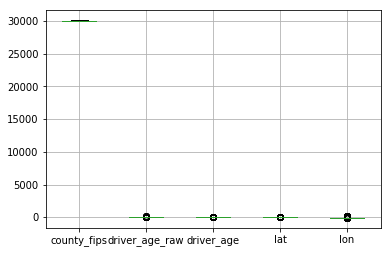

In [33]:
float_var2.boxplot()

In [34]:
float_var2.describe()

,county_fips,driver_age_raw,driver_age,lat,lon
count,821062.000000,825118.000000,821638.000000,824682.000000,824682.000000
mean,30051.789626,39.240020,39.401292,46.871360,-110.993188
std,31.660891,15.884145,15.716828,1.216404,3.694875
min,30001.000000,0.000000,15.000000,0.000000,-122.131522
25%,30029.000000,26.000000,26.000000,45.914703,-114.015515
50%,30047.000000,37.000000,37.000000,46.757568,-111.541818
75%,30077.000000,51.000000,51.000000,47.687818,-108.884178
max,30111.000000,240.000000,99.000000,89.999720,179.000000


The range of values county_fips 	d is far more than the other float variables .. 

however, the distribution of all variables is almost normal .. 

In [35]:
for i in float_var2:
    float_var2[i].fillna(float_var2[i].mean(), inplace=True)

In [36]:
float_var2.isnull().any()

county_fips       False
driver_age_raw    False
driver_age        False
lat               False
lon               False
dtype: bool

In [37]:
cat_var2 = df2.select_dtypes(include=['object'])
cat_var2.head()

,id,state,stop_date,stop_time,location_raw,county_name,fine_grained_location,driver_gender,driver_race_raw,driver_race,...,contraband_found,stop_outcome,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,stop_outcome_raw
0,MT-2009-00001,MT,2009-01-01,02:10,CASCADE,Cascade County,US 89 N MM10 (SB),F,White,White,...,False,Citation,N,NaN,False,1994,FORD,EXPLORER,SPORT UTILITY,"TRAFFIC CITATION,WARNING"
1,MT-2009-00002,MT,2009-01-02,11:34,MISSOULA,Missoula County,HWY 93 SO AND ANNS LANE S/B,M,White,White,...,False,Arrest,N,NaN,False,1996,GMC,TK,TRUCK,"INFFRACTION ARREST,WARNING"
2,MT-2009-00003,MT,2009-01-03,11:36,MISSOULA,Missoula County,P007 HWY 93 MM 77 N/B,M,White,White,...,False,Arrest,N,NaN,False,1999,GMC,YUKON,SPORT UTILITY,INFFRACTION ARREST
3,MT-2009-00004,MT,2009-01-04,10:33,MISSOULA,Missoula County,P007 HWY 93 MM 81 S/B,F,NaN,NaN,...,False,Arrest,NaN,NaN,False,2002,HOND,CR-V,SPORT UTILITY,INFFRACTION ARREST
4,MT-2009-00005,MT,2009-01-04,10:46,MISSOULA,Missoula County,P007 HWY 93 MM 81 N/B,M,NaN,NaN,...,False,Arrest,NaN,NaN,False,1992,TOYT,TERCEL,SEDAN,INFFRACTION ARREST


In [38]:
for i in cat_var2:
    cat_var2[i].fillna(cat_var2[i].mode()[0], inplace=True)

In [39]:
cat_var2.isnull().any()

id                       False
state                    False
stop_date                False
stop_time                False
location_raw             False
county_name              False
fine_grained_location    False
driver_gender            False
driver_race_raw          False
driver_race              False
violation_raw            False
violation                False
contraband_found         False
stop_outcome             False
ethnicity                False
city                     False
out_of_state             False
vehicle_year             False
vehicle_make             False
vehicle_model            False
vehicle_style            False
stop_outcome_raw         False
dtype: bool

## Data cleaning and Exploration:

## Q_1:
What proportion of traffic stops in Montana involved male drivers? In other words, divide the number of traffic stops involving male drivers by the total number of stops. 

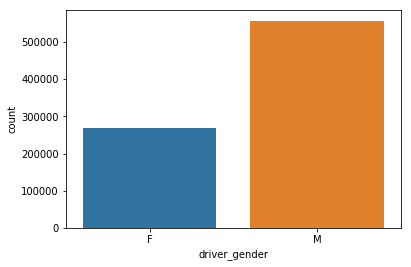

In [40]:
sns.countplot(cat_var2.driver_gender)

In [41]:
df2.driver_gender.value_counts()/len(df2)

M    0.674975
F    0.324881
Name: driver_gender, dtype: float64

Answer: 0.674975

## Q_3:

How much more likely does a traffic stop in Montana result in a DUI than a traffic stop in Vermont? To compute the proportion of traffic stops that result in a DUI, divide the number of stops with "DUI" in the violation description by the total number of stops. 

In [42]:
df.violation.value_counts()

Moving violation      218302
Equipment              51934
Other                  10120
DUI                      749
Other (non-mapped)         2
Name: violation, dtype: int64

In [43]:
df2.violation.value_counts()

Speeding                                                336980
License,Speeding                                         58572
Paperwork,Speeding                                       46513
Lights                                                   42809
License,Paperwork,Speeding                               28708
Safe movement                                            26136
License                                                  20602
Seat belt,Speeding                                       16473
Registration/plates                                      15988
License,Lights                                           12442
Stop sign/light                                          11239
License,Paperwork                                         9645
Other                                                     9118
Lights,Paperwork                                          7947
Truck                                                     7353
License,Lights,Paperwork                               

In [44]:
len(cat_var2[cat_var2['violation'].str.contains('DUI')])  # value_counts if the violation cell contains DUI 

8914

In [45]:
montana_vermont_ratio = 8914.0/749.0
montana_vermont_ratio

11.901201602136181

In [46]:
749.0/8914.0
8914.0/len(df2)

0.010803303285105887

In [47]:
# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(diabetes_X_train, diabetes_y_train)

## Q5:

Perform a (χ2) test to determine whether the proportions of arrests in these two populations are equal. What is the value of the test statistic? 

In [48]:
# import scipy.stats as scs


# def categories(series):
#     return range(int(series.min()), int(series.max()) + 1)


# def chi_square_of_df_cols(col1, col2):
#     df_col1, df_col2 = col1, col2

#     result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
#                for cat2 in categories(df_col2)]
#               for cat1 in categories(df_col1)]

#     return scs.chi2_contingency(result)



## Q6: 

How many more times likely are you to be arrested in Montana during a traffic stop if you have out of state plates? 

In [49]:
df2.is_arrested.unique()

array([False,  True], dtype=bool)

In [50]:
df2.is_arrested.value_counts()

False    807923
True      17195
Name: is_arrested, dtype: int64

In [51]:
arrested_ratio = 17195.0/len(int_var2)
arrested_ratio

0.020839443570495372

## Q7:

What proportion of traffic stops in Montana resulted in speeding violations? In other words, find the number of violations that include "Speeding" in the violation description and divide that number by the total number of stops (or rows in the Montana dataset). 

In [52]:
len(cat_var2[cat_var2['violation'].str.contains('Speeding')])  # value_counts if the violation cell contains DUI 

543083

In [53]:
speeding_ratio = 543083.0/len(cat_var2)
speeding_ratio

0.6581882833728024

## Q8:
What is the extrapolated, average manufacture year of vehicles involved in traffic stops in Montana in 2020? To answer this question, calculate the average vehicle manufacture year for each year's traffic stops. Extrapolate using a linear regression. 

In [54]:
df2.columns

Index([u'id', u'state', u'stop_date', u'stop_time', u'location_raw',
       u'county_name', u'county_fips', u'fine_grained_location',
       u'driver_gender', u'driver_age_raw', u'driver_age', u'driver_race_raw',
       u'driver_race', u'violation_raw', u'violation', u'search_conducted',
       u'contraband_found', u'stop_outcome', u'is_arrested', u'lat', u'lon',
       u'ethnicity', u'city', u'out_of_state', u'vehicle_year',
       u'vehicle_make', u'vehicle_model', u'vehicle_style',
       u'stop_outcome_raw'],
      dtype='object')

In [55]:
temp = df2.groupby('vehicle_year').mean()
temp.head(3)

,county_fips,driver_age_raw,driver_age,search_conducted,is_arrested,lat,lon
vehicle_year,,,,,,,
1915.0,30051.0,43.0,43.0,0.0,0.0,47.639858,-113.370168
1925.0,30029.0,52.0,52.0,0.0,1.0,48.112402,-114.251067
1926.0,30029.0,56.0,56.0,0.0,0.0,48.291848,-114.254808


In [56]:
# df2.replace(df2['vehicle_year'].loc[df2['vehicle_year'] == 'NON-'], df2['vehicle_year'].mode()[0])
# df2.replace(df2['vehicle_year'].loc[df2['vehicle_year'] == 'UNK'], df2['vehicle_year'].mode()[0])

# df2.vehicle_year.unique()

# df2['vehicle_year'].mode()[0]

In [57]:
# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(temp, df2.vehicle_year)

## Q9:

Combining both the Vermont and Montana datasets, find the hours when the most and least number of traffic stops occurred. What is the difference in the total number of stops that occurred in these two hours? Hours range from 00 to 23. Round stop times down to compute this difference. 

## Q10:

We can use the traffic stop locations to estimate the areas of the counties in Montana. Represent each county as an ellipse with semi-axes given by a single standard deviation of the longitude and latitude of stops within that county. What is the area, in square kilometers, of the largest county measured in this manner? Please ignore unrealistic latitude and longitude coordinates. 

In [111]:
df2.columns

Index([u'id', u'state', u'stop_date', u'stop_time', u'location_raw',
       u'county_name', u'county_fips', u'fine_grained_location',
       u'driver_gender', u'driver_age_raw', u'driver_age', u'driver_race_raw',
       u'driver_race', u'violation_raw', u'violation', u'search_conducted',
       u'contraband_found', u'stop_outcome', u'is_arrested', u'lat', u'lon',
       u'ethnicity', u'city', u'out_of_state', u'vehicle_year',
       u'vehicle_make', u'vehicle_model', u'vehicle_style',
       u'stop_outcome_raw'],
      dtype='object')